<div style="text-align:center; font-size:24px;">
    Predicting Medical Insurance Charge
</div>




# Problem 
The problem we are solving is to predict how much the insurance charge is going to be based on the provided features.


# Data
The data we got is Medical Cost Personal Datasets from kaggle:

https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv

# Features 
These are the features in this dataset:
age: age of primary beneficiary

<u>sex</u>
: insurance contractor gender, female, male

<u>bmi</u>
: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

<u>children</u>: Number of children covered by health insurance / Number of dependents

<u>smoker</u>: Smoking

<u>region</u>: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

<u>charges</u>: Individual medical costs billed by health insurance


# Evaluation 

Since we are predicting the price, we will be using Regression model. The metrics we are using are:

The <u>Mean Absolute Error (MAE)</u> measures the average absolute difference between the predicted values and the actual values.
It is calculated as the mean of the absolute differences between predicted and actual values.
MAE is easy to understand because it represents the average magnitude of errors in the same unit as the target variable.
Formula: MAE = (1/n) * Σ|predicted - actual|
Lower MAE values indicate better model performance.
Mean Squared Error (MSE):

The <u>Mean Squared Error (MSE)</u> measures the average squared difference between the predicted values and the actual values.
It is calculated as the mean of the squared differences between predicted and actual values.
MSE penalizes larger errors more heavily than MAE because errors are squared.
Formula: MSE = (1/n) * Σ(predicted - actual)^2
Lower MSE values indicate better model performance.
R-squared (R2) Score:

The <u>R-squared (R2)</u> score quantifies the proportion of the variance in the target variable that is predictable from the independent variables (features) in the model.
It represents the goodness-of-fit of the model. An R2 score of 1 indicates that the model perfectly explains the variance in the target variable, while an R2 score of 0 means the model does no better than simply predicting the mean of the target variable.
Range: [0, 1]
Formula: R2 = 1 - (MSE / Var(y))
Var(y) is the variance of the actual target values.
Higher R2 values indicate better model performance, with 1 being the best.

# Importing the libaries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Importing the dataset

In [2]:
df = pd.read_csv("/Users/sonamsherpa/Downloads/insurance.csv")  # importing the csv file using pandas libary
df.head(5) # viewing the top 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Getting some information about the dataset 
df.info()  # The appears to be only 1,338 rows of data, while none of them seem to have any missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# basic stats about the numerical data and checking for outlieres
df.describe()  
# the age range appears to be 18-64 years old with the average being around 39 years old. 
# The lowest BMI appears to be 16, which is underweight but still possible, while the max appears to be 53 which is also really high but still possible. 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Here's how BMI categories are typically classified:

Underweight: BMI less than 18.5 

Normal Weight: BMI between 18.5 and 24.9

Overweight: BMI between 25 and 29.9

Obesity (Class I): BMI between 30 and 34.9

Obesity (Class II): BMI between 35 and 39.9

Obesity (Class III): BMI of 40 or greater (severe or morbid obesity)

In [5]:
# Creating a copy of the data 
insurance_df = df.copy()
insurance_df.head()
# We create a copy of the data so we have the original, incase we need to go back and fix something. It is also best practice to always create a copy of the orignal data.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis (EDA)

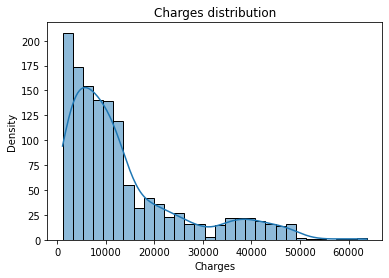

In [6]:
# What is the distribution of charges?
import seaborn as sns

# Create a histogram with Seaborn
sns.histplot(insurance_df["charges"], kde=True)  # The kde parameter adds a Kernel Density Estimate plot
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Charges distribution')
plt.show()

# Looks like majority of the cost are less than 10,000

In [7]:
# Is there a gender-based difference in charges?
# Investigate whether there is a significant difference in charges between males and females.
print(round(insurance_df.groupby("sex")["charges"].mean(),2))
print(round(insurance_df.groupby("sex")["charges"].count(),2))

# According to this dataset, male are charged more than female.

sex
female    12569.58
male      13956.75
Name: charges, dtype: float64
sex
female    662
male      676
Name: charges, dtype: int64


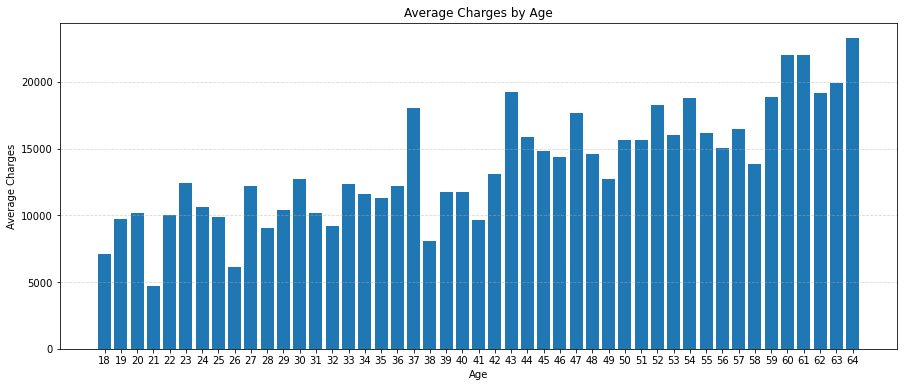

In [8]:
# How do charges vary by age?
# Explore the relationship between age and medical charges. Do older individuals tend to have higher medical costs?  

import pandas as pd
import matplotlib.pyplot as plt

# Assuming insurance_df is your DataFrame
# Group by "age" and calculate the mean of "charges" rounded to 2 decimal places
mean_charges_by_age = insurance_df.groupby("age")["charges"].mean().round(2)

# Reset the index to make "age" a column
mean_charges_by_age = mean_charges_by_age.reset_index()

# Create a bar plot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(mean_charges_by_age["age"], mean_charges_by_age["charges"])
plt.xlabel("Age")
plt.ylabel("Average Charges")
plt.title("Average Charges by Age")
plt.xticks(mean_charges_by_age["age"])  # Show all age values on the x-axis
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


The older people do tend to get charged more. The top 5 highest charged age groups were in their 60s. While the youngers age groups were charged less. The graphs above also shows that the charges steadly increases as age increases.

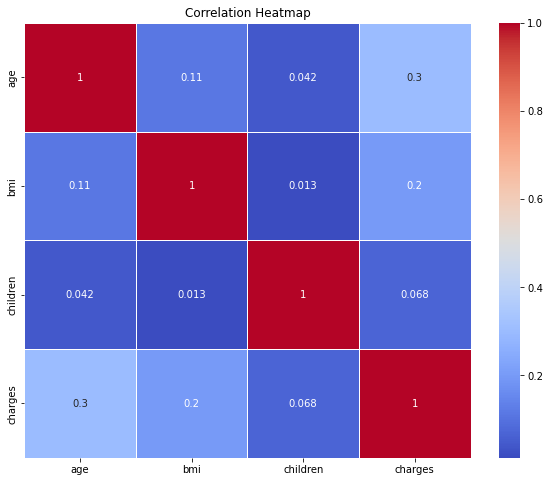

In [9]:
# Creating a heatmap to show the correlation between the different features. 
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = insurance_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


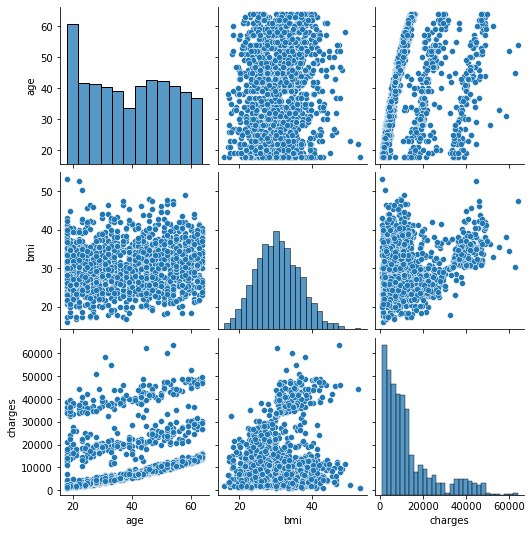

In [10]:
# Using pairplot to see the relationship between continious variable columns
import seaborn as sns

# Example: Pair plot of age, bmi, and charges
sns.pairplot(insurance_df[["age", "bmi", "charges"]])
plt.show()


# Preprocessing the data 

In [11]:
# Select non-numeric columns
non_numeric_columns = insurance_df.select_dtypes(exclude=['number'])

# Change the data type of non-numeric columns to categorical
insurance_df[non_numeric_columns.columns] = insurance_df[non_numeric_columns.columns].astype('category') 

insurance_df.info()  # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Loop through the columns and encode each one
for column in non_numeric_columns:
    insurance_df[column] = encoder.fit_transform(insurance_df[column])

# Display the resulting DataFrame
print(insurance_df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [13]:
# Spliting the data into independent variables (x) and dependant variables (y)
x = insurance_df.iloc[:,:-1].values
y = insurance_df.iloc[:,-1].values

In [14]:
# spliting into training and testing data set 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

# Standardizing the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting in the x_train data and the x_test data
# We fit them seperatly so it doesn't overfit the data
scaler.fit_transform(x_train)
scaler.transform(x_test)

It looks like it performs better without standarding the data

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

# Creating the model 

In [36]:
# importing the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

In [37]:
# Importing the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create a random forest regressor
forest_regressor = RandomForestRegressor()

# Define hyperparameter distribution for tuning
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search = RandomizedSearchCV(forest_regressor, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error')
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best Hyperparameters:
n_estimators: 100
min_samples_split: 5
min_samples_leaf: 4
max_depth: 5


In [20]:
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")


Best n_estimators: 50
Best max_depth: 5
Best min_samples_split: 5
Best min_samples_leaf: 4


In [21]:
# Create a Random Forest Regressor with the best hyperparameters
best_forest_regressor = RandomForestRegressor(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf
)

# Fit the model to your training data
best_forest_regressor.fit(x_train, y_train)

# Make predictions and evaluate the model as needed
y_pred = best_forest_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.2f}")


Mean Squared Error on Test Data: 18669759.52


# Evaluation Metrics

In [22]:
def evaluate_linear_regression(x_train, y_train, x_test, y_test):
    # Fit the model to your training data
    best_forest_regressor.fit(x_train, y_train)
    
    # Make predictions and evaluate the model as needed
    y_pred = best_forest_regressor.predict(x_test)
    
    # Compute regression metrics
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R-squared (R²)': r2_score(y_test, y_pred)
    }
    
    return metrics

In [23]:
evaluate_linear_regression(x_train, y_train, x_test, y_test)

{'MAE': 2440.2793039099597,
 'MSE': 18386874.840477448,
 'RMSE': 4287.9919356824175,
 'R-squared (R²)': 0.8815650558700265}

In [24]:
y_pred = best_forest_regressor.predict(x_test)
print(y_pred[:10].round(2))
print(y_test[:10].round(2))


[10556.36  5701.55 27059.16 10298.99 34759.5   6491.55  2402.81 13889.82
  5430.08 11126.35]
[ 9095.07  5272.18 29330.98  9301.89 33750.29  4536.26  2117.34 14210.54
  3732.63 10264.44]


In [25]:
# Calculate prediction intervals (95% prediction intervals)
# You can adjust the confidence level as needed (e.g., 90%, 99%)
alpha = 0.5  # 95% confidence level
n_trees = len(best_forest_regressor.estimators_)

# Initialize an array to store prediction intervals
prediction_intervals = []

# Calculate prediction intervals for each data point
for i in range(len(x_test)):
    predictions = [tree.predict(x_test[i:i+1]) for tree in best_forest_regressor.estimators_]
    lower_bound = np.percentile(predictions, 100 * alpha / 2.0)
    upper_bound = np.percentile(predictions, 100 * (1 - alpha / 2.0))
    prediction_intervals.append((lower_bound, upper_bound))

# Calculate the Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Print or visualize the prediction intervals for specific data points
for i, (lower, upper) in enumerate(prediction_intervals):
    print(f"Data Point {i+1}: Prediction Interval [{lower:.2f}, {upper:.2f}]")


Mean Squared Error: 18386874.84
Data Point 1: Prediction Interval [9385.80, 11366.92]
Data Point 2: Prediction Interval [4796.51, 6701.11]
Data Point 3: Prediction Interval [25293.99, 28642.39]
Data Point 4: Prediction Interval [9567.74, 10930.17]
Data Point 5: Prediction Interval [34114.70, 35361.01]
Data Point 6: Prediction Interval [5645.80, 6986.48]
Data Point 7: Prediction Interval [1992.60, 2623.85]
Data Point 8: Prediction Interval [13491.39, 14150.64]
Data Point 9: Prediction Interval [4273.88, 6242.88]
Data Point 10: Prediction Interval [10043.40, 11851.03]
Data Point 11: Prediction Interval [18243.98, 19889.87]
Data Point 12: Prediction Interval [6745.59, 7586.92]
Data Point 13: Prediction Interval [4457.22, 6281.20]
Data Point 14: Prediction Interval [44906.35, 46554.14]
Data Point 15: Prediction Interval [47557.08, 49121.52]
Data Point 16: Prediction Interval [44715.69, 46429.56]
Data Point 17: Prediction Interval [9835.54, 10903.71]
Data Point 18: Prediction Interval [4158

# Lasso Model

In [26]:
from sklearn import linear_model
model2 = linear_model.Lasso(alpha=0.1)

In [27]:
def evaluate_linear_lasso(x_train, y_train, x_test, y_test):
    # Fit the model to your training data
    model2.fit(x_train,y_train)
    
    # Make predictions and evaluate the model as needed
    y_pred2=model2.predict(x_test)
    
    # Compute regression metrics
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred2),
        'MSE': mean_squared_error(y_test, y_pred2),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred2)),
        'R-squared (R²)': r2_score(y_test, y_pred2)
    }
    
    return metrics
evaluate_linear_lasso(x_train, y_train, x_test, y_test)

{'MAE': 4186.582632817467,
 'MSE': 33635622.345914654,
 'RMSE': 5799.622603748856,
 'R-squared (R²)': 0.7833436574797586}

# It looks like the RandomForest Regressor was the better model in this instance
{'MAE': 2475.27713843953,
 'MSE': 18793949.648424905,
 'RMSE': 4335.198916823184,
 'R-squared (R²)': 0.8789429744910942}

In [28]:
Pred_vs_actual=pd.DataFrame({"Prediction":y_pred, 
             "Actual": y_test})
Pred_vs_actual.head(5)

,Prediction,Actual
0,10556.364041,9095.06825
1,5701.549688,5272.17580
2,27059.161586,29330.98315
3,10298.987960,9301.89355
4,34759.495430,33750.29180


In [29]:
Pred_vs_actual["difference"] = Pred_vs_actual["Prediction"]-Pred_vs_actual["Actual"]
Pred_vs_actual["percent_diff"] = Pred_vs_actual["difference"]/Pred_vs_actual["Actual"]*100
Pred_vs_actual

,Prediction,Actual,difference,percent_diff
0,10556.364041,9095.06825,1461.295791,16.066903
1,5701.549688,5272.17580,429.373888,8.144150
2,27059.161586,29330.98315,-2271.821564,-7.745467
3,10298.987960,9301.89355,997.094410,10.719263
4,34759.495430,33750.29180,1009.203630,2.990207
...,...,...,...,...
263,47679.267528,47055.53210,623.735428,1.325530
264,12556.954584,12222.89830,334.056284,2.733037
265,7563.108533,6067.12675,1495.981783,24.657170
266,47127.121994,63770.42801,-16643.306016,-26.098784


In [30]:
import pandas as pd

# Create a list of dictionaries to store the data
data = []

for i, (lower, upper) in enumerate(prediction_intervals):
    data.append({
        'Data Point': f"Data Point {i+1}",
        'Prediction Interval': f"[{lower:.2f}, {upper:.2f}]"
    })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


         Data Point   Prediction Interval
0      Data Point 1   [9385.80, 11366.92]
1      Data Point 2    [4796.51, 6701.11]
2      Data Point 3  [25293.99, 28642.39]
3      Data Point 4   [9567.74, 10930.17]
4      Data Point 5  [34114.70, 35361.01]
..              ...                   ...
263  Data Point 264  [46415.58, 48829.78]
264  Data Point 265  [11964.40, 13043.99]
265  Data Point 266    [6745.59, 8262.19]
266  Data Point 267  [45455.10, 48769.02]
267  Data Point 268   [9835.54, 10903.71]

[268 rows x 2 columns]


In [39]:
# Creating a DataFrame with the prediction, actual y_test, difference and the 95% predicition interval
Pred_vs_actual["95% Prediction Interval"]=df["Prediction Interval"]
Pred_vs_actual.head(20)

,Prediction,Actual,difference,percent_diff,95% Prediction Interval
0,10556.364041,9095.06825,1461.295791,16.066903,"[9385.80, 11366.92]"
1,5701.549688,5272.17580,429.373888,8.144150,"[4796.51, 6701.11]"
2,27059.161586,29330.98315,-2271.821564,-7.745467,"[25293.99, 28642.39]"
3,10298.987960,9301.89355,997.094410,10.719263,"[9567.74, 10930.17]"
4,34759.495430,33750.29180,1009.203630,2.990207,"[34114.70, 35361.01]"
5,6491.546711,4536.25900,1955.287711,43.103529,"[5645.80, 6986.48]"
6,2402.813145,2117.33885,285.474295,13.482693,"[1992.60, 2623.85]"
7,13889.816874,14210.53595,-320.719076,-2.256910,"[13491.39, 14150.64]"
8,5430.075136,3732.62510,1697.450036,45.476039,"[4273.88, 6242.88]"
9,11126.354703,10264.44210,861.912603,8.397072,"[10043.40, 11851.03]"
